In [1]:
#For Now I am strictly following the offical tensorflow guide to linear regression: https://www.youtube.com/watch?v=-vHQub0NXI4
#This is becuse I want to make sure I'm not screwing anything up; I will experiment later once I get this to work

In [2]:

#imports 
import pathlib
import pandas as pd 
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import time

#NBA Imports
import nba_api
from nba_api.stats.static import teams, players
from nba_api.stats.endpoints import playercareerstats, leaguegamefinder, playerdashboardbyclutch, playergamelogs, commonplayerinfo, teamplayeronoffdetails, teamgamelogs


In [3]:
#Abbreviation Codes for all NBA Teams
team_abbreviations = {
    "ATL": 1,
    "BKN": 2,
    "BOS": 3,
    "CHA": 4,
    "CHI": 5,
    "CLE": 6,
    "DAL": 7,	
    "DEN": 8,
    "DET": 9,
    "GSW": 10,	
    "HOU": 11,	
    "IND": 12,
    "LAC": 13,	
    "LAL": 14,	
    "MEM": 15, 	
    "MIA": 16,	
    "MIL": 17,	
    "MIN": 18,	
    "NOP": 19,
    "NOH": 19,	
    "NYK": 20,	
    "OKC": 21,	
    "ORL": 22,	
    "PHI": 23,	
    "PHX": 24,	
    "POR": 25,	
    "SAC": 26,	
    "SAS": 27,	
    "TOR": 28,	
    "UTA": 29,	
    "WAS": 30
}

In [26]:
class Player(object):

    #Set up basic Player info
    def __init__(self, PlayerID):
        self.PlayerID =  PlayerID 
        self.PlayerName = players.find_player_by_id(player_id=self.PlayerID)['full_name']

        time.sleep(2) #TODO: Test, this may not be nessisary

        #self.StartYear = commonplayerinfo.CommonPlayerInfo(player_id= self.PlayerID).get_data_frames()[0]['FROM_YEAR'][0] 
        #if self.StartYear < 2010:
         #   self.StartYear = 2010    
        self.StartYear = 2012
        self.LastYear = 2021
        

    def compile_active_player_data(self):
        #This function compiles all the data for the plater
        player_name = []
        points_scored_raw_data=[]
        game_date_raw_data = [] #This is not currently being used
        win_loss_raw_data = [] #This is not currently being used
        free_throws_raw_data = []  #This is not currently being used
        feild_goals_2pts_raw_data = [] #This is not currently being used
        feild_goals_3pts_raw_data = [] #THis is not currently being used
        matchup_raw_data = []
        location = []
        min_played_raw_data = []
        team_season_point_average_api_data = []
        team_season_point_average_raw_data = []
        team_season_points_raw_data = []
        opponent_season_point_average_raw_data = []
        opponent_season_points_average_api_data = []
        opponent_season_points_raw_data = []
        
        
        
        print(self.StartYear, self.LastYear)
        for year in range((self.StartYear), (self.LastYear)):   #Compiles data for individual years
            print("-------------------------------------------------")
            season = str(year) + "-" + str(((year+1)-2000)) #sets up the season arrgument in the correct format
            playerLogs = playergamelogs.PlayerGameLogs(player_id_nullable=self.PlayerID, season_nullable=season) #Get player data for a season
            self.TeamID = playerLogs.get_data_frames()[0]["TEAM_ID"][0] 
            teamLogs = teamgamelogs.TeamGameLogs(team_id_nullable=self.TeamID, season_nullable=season) #Get player Team data for the season
            print(season)
            
            #Get the specific feild data from the API
            game_date_api_data = playerLogs.get_data_frames()[0]["GAME_DATE"] 
            #win_loss_api_data = playerLogs.get_data_frames()[0]["WL"]
            free_throws_api_data = playerLogs.get_data_frames()[0]["FTM"]
            feild_goals_2pts_api_data = playerLogs.get_data_frames()[0]["FGM"]
            feild_goals_3pts_api_data = playerLogs.get_data_frames()[0]["FG3M"] 
            min_played_api_data = playerLogs.get_data_frames()[0]["MIN"]
            matchup_api_data = playerLogs.get_data_frames()[0]["MATCHUP"]
            team_season_points_api_data = teamLogs.get_data_frames()[0]['PTS']
            print(playerLogs.get_data_frames()[0])


            season_team_points = []
            opponent_season_points = []
            for game in range(0, len(game_date_api_data)):

                    self.TeamID = playerLogs.get_data_frames()[0]["TEAM_ID"][game]

                    #testing a differend way of doing this
                    '''
                    team_free_throws_average_api_data = teamLogs.get_data_frames()[0]["FTM"].mean()
                    team_feild_goals_2pts_average_api_data = teamLogs.get_data_frames()[0]["FGM"].mean()
                    team_feild_goals_3pts_average_api_data = teamLogs.get_data_frames()[0]["FG3M"].mean()
                    '''
                    #print(team_season_points_api_data)
                    print("this is it",team_season_points_api_data[game])
                    team_season_points_raw_data.append(team_season_points_api_data[game])
                    season_team_points.append(team_season_points_api_data[game])
                    if game == 0:
                        print("Im in here", team_season_points_raw_data[game])
                        team_season_point_average_raw_data.append(teamLogs.get_data_frames()[0]["PTS"][game])
                    else:
                        print("Now Im in here", (sum(season_team_points)/len(season_team_points)))
                        team_season_point_average_raw_data.append((sum(season_team_points)/len(season_team_points)))
                    #team_season_point_average_api_data = ((team_free_throws_average_api_data) + (team_feild_goals_2pts_average_api_data*2) + (team_feild_goals_3pts_average_api_data*3))
                    #team_season_point_average_api_data.append(team_season_points_raw_data.mean())
                    
                    player_name.append(self.PlayerName)
                    game_date_raw_data.append(game_date_api_data[game])
                    
                    points_scored_raw_data.append((free_throws_api_data[game])+(feild_goals_2pts_api_data[game]*2)+(feild_goals_3pts_api_data[game]*3))
                    
                    min_played_raw_data.append(min_played_api_data[game])

                    player_team_abbreviation= playerLogs.get_data_frames()[0]['TEAM_ABBREVIATION'][game]
                    if " vs. " in matchup_api_data[game]:
                        location.append(1)
                    elif "@" in matchup_api_data[game]:
                        location.append(2)

                    try:   
                        matchup_api_data[game] = matchup_api_data[game].replace(player_team_abbreviation, "")
                    except:
                        print("Unexpected Error with removing player team")
                    try:
                        matchup_api_data[game] = matchup_api_data[game].replace(" @ ", "")
                        matchup_api_data[game] = matchup_api_data[game].replace(" vs. ", "")
                    except:
                        print("Error")
    
                    matchup_api_data = matchup_api_data.replace('NOH', 'NOP')
                    matchup_api_data = matchup_api_data.replace('NJN', 'BKN')
                    opponentAbbreviation = matchup_api_data[game]
                    matchup_api_data[game] = team_abbreviations[opponentAbbreviation]
                    matchup_raw_data.append(matchup_api_data[game])
                
                    opponentID = int(teams.find_team_by_abbreviation(opponentAbbreviation)["id"])
                    if (game%10==0):
                        print(game)
                        
                
                  
                    
                    #team_season_point_average_api_data = ((team_free_throws_average_api_data) + (team_feild_goals_2pts_average_api_data*2) + (team_feild_goals_3pts_average_api_data*3))
                    #team_season_point_average_api_data.append(team_season_points_raw_data.mean())
                    opponentLogs = teamgamelogs.TeamGameLogs(team_id_nullable=opponentID, season_nullable=season)
                    opponent_season_points_api_data = opponentLogs.get_data_frames()[0]['PTS']
                    print("this is it",opponent_season_points_api_data[game])
                    opponent_season_points_raw_data.append(opponent_season_points_api_data[game])
                    opponent_season_points.append(opponent_season_points_api_data[game])
                    print("Opponent")
                    if game == 0:
                        print("Im in here", opponent_season_points_raw_data[game])
                        opponent_season_point_average_raw_data.append(opponentLogs.get_data_frames()[0]["PTS"][game])
                    else:
                        print("Now Im in here", (sum(opponent_season_points)/len(opponent_season_points)))
                        opponent_season_point_average_raw_data.append((sum(opponent_season_points)/len(opponent_season_points)))
                        
                    '''opponent_free_throws_average_api_data = opponentLogs.get_data_frames()[0]["FTM"].mean()
                    opponent_feild_goals_2pts_average_api_data = opponentLogs.get_data_frames()[0]["FGM"].mean()
                    opponent_feild_goals_3pts_average_api_data = opponentLogs.get_data_frames()[0]["FG3M"].mean()
                    opponent_season_point_average_api_data = ((opponent_free_throws_average_api_data) + (opponent_feild_goals_2pts_average_api_data*2) + (opponent_feild_goals_3pts_average_api_data*3))


                    opponent_team_season_point_average_raw_data.append(opponent_season_point_average_api_data)'''   
                    
                    time.sleep(1)
                    

        print("the lengths")
        print(len(player_name))
        print(len(min_played_raw_data))
        print(len(points_scored_raw_data))
        print(len(game_date_raw_data))
        #print(len(win_loss_raw_data))
        print(len(matchup_raw_data))
        print(len(location))
        print(len(team_season_point_average_raw_data))
        print(len(opponent_season_point_average_raw_data))

        player_data = {
        "Player Name": player_name,
        "Points Scored": points_scored_raw_data,
        "Game Date": game_date_raw_data,
        "MIN Played": min_played_raw_data,
        #"Win/Loss": win_loss_raw_data,
        #"Free Throws": free_throws_raw_data,
        #"Feild Goals 2pts": feild_goals_2pts_raw_data,
        #"Feild Goals 3pts": feild_goals_3pts_raw_data,
        "Matchup": matchup_raw_data,
        #"Location": location,
        "Team Point Average" : team_season_point_average_raw_data,
        "Opponent Team Point Average": opponent_season_point_average_raw_data 
        }

        player_dataFrame = pd.DataFrame(data=player_data)
        print(player_dataFrame)

        return(player_dataFrame)


    def get_active_player_data(self):
        return(self.compile_active_player_data())



In [27]:
#Data Preparation

test = Player(203081).get_active_player_data()




    
opponent = test.pop('Matchup')
#test = test.replace(1.0)
test["ATL"] = (opponent == 1)*1.0
test["BKN"] = (opponent == 2)*1.0
test["BOS"] = (opponent == 3)*1.0
test["CHA"] = (opponent == 4)*1.0
test["CHI"] = (opponent == 5)*1.0
test["CLE"] = (opponent == 6)*1.0
test["DAL"] = (opponent == 7)*1.0
test["DEN"] = (opponent == 8)*1.0
test["DET"] = (opponent == 9)*1.0
test["GSW"] = (opponent == 10)*1.0
test["HOU"] = (opponent == 11)*1.0
test["IND"] = (opponent == 12)*1.0
test["LAC"] = (opponent == 13)*1.0
test["LAL"] = (opponent == 14)*1.0
test["MEM"] = (opponent == 15)*1.0
test["MIA"] = (opponent == 16)*1.0
test["MIL"] = (opponent == 17)*1.0
test["MIN"] = (opponent == 18)*1.0
test["NOP"] = (opponent == 19)*1.0
test["NYK"] = (opponent == 20)*1.0
test["OKC"] = (opponent == 21)*1.0
test["ORL"] = (opponent == 22)*1.0
test["PHI"] = (opponent == 23)*1.0
test["PHX"] = (opponent == 24)*1.0
test["POR"] = (opponent == 25)*1.0
test["SAC"] = (opponent == 26)*1.0
test["SAS"] = (opponent == 27)*1.0
test["TOR"] = (opponent == 28)*1.0
test["UTA"] = (opponent == 29)*1.0
test["WAS"] = (opponent == 30)*1.0		

'''
location = test.pop("Location")

test["Home"] = (location == 1)*1.0
test["Away"] = (location == 2)*1.0


outcome = test.pop("Win/Loss")
test["Win"] = (outcome == 1)*1.0
test["Loss"] = (outcome == 2)*1.0
'''

test    



test = test.drop(columns=["Player Name", "Game Date", "POR"])


print(test)




2012 2021
-------------------------------------------------
2012-13
   SEASON_YEAR  PLAYER_ID     PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION  \
0      2012-13     203081  Damian Lillard  1610612757               POR   
1      2012-13     203081  Damian Lillard  1610612757               POR   
2      2012-13     203081  Damian Lillard  1610612757               POR   
3      2012-13     203081  Damian Lillard  1610612757               POR   
4      2012-13     203081  Damian Lillard  1610612757               POR   
..         ...        ...             ...         ...               ...   
77     2012-13     203081  Damian Lillard  1610612757               POR   
78     2012-13     203081  Damian Lillard  1610612757               POR   
79     2012-13     203081  Damian Lillard  1610612757               POR   
80     2012-13     203081  Damian Lillard  1610612757               POR   
81     2012-13     203081  Damian Lillard  1610612757               POR   

                 TEAM_NAME     

this is it 128
Opponent
Now Im in here 101.70833333333333
this is it 125
Now Im in here 98.20408163265306
this is it 119
Opponent
Now Im in here 102.06122448979592
this is it 102
Now Im in here 98.28
this is it 92
Opponent
Now Im in here 101.86
this is it 86
Now Im in here 98.03921568627452
50
this is it 113
Opponent
Now Im in here 102.07843137254902
this is it 79
Now Im in here 97.67307692307692
this is it 123
Opponent
Now Im in here 102.48076923076923
this is it 105
Now Im in here 97.81132075471699
this is it 105
Opponent
Now Im in here 102.52830188679245
this is it 89
Now Im in here 97.64814814814815
this is it 99
Opponent
Now Im in here 102.46296296296296
this is it 87
Now Im in here 97.45454545454545
this is it 100
Opponent
Now Im in here 102.41818181818182
this is it 109
Now Im in here 97.66071428571429
this is it 108
Opponent
Now Im in here 102.51785714285714
this is it 96
Now Im in here 97.63157894736842
this is it 85
Opponent
Now Im in here 102.21052631578948
this is it 96
Now

this is it 124
Opponent
Now Im in here 103.53846153846153
this is it 116
Now Im in here 102.78571428571429
this is it 117
Opponent
Now Im in here 104.5
this is it 120
Now Im in here 103.93333333333334
this is it 115
Opponent
Now Im in here 105.2
this is it 112
Now Im in here 104.4375
this is it 94
Opponent
Now Im in here 104.5
this is it 111
Now Im in here 104.82352941176471
this is it 121
Opponent
Now Im in here 105.47058823529412
this is it 90
Now Im in here 104.0
this is it 119
Opponent
Now Im in here 106.22222222222223
this is it 99
Now Im in here 103.73684210526316
this is it 90
Opponent
Now Im in here 105.36842105263158
this is it 113
Now Im in here 104.2
this is it 118
Opponent
Now Im in here 106.0
this is it 98
Now Im in here 103.9047619047619
20
this is it 110
Opponent
Now Im in here 106.19047619047619
this is it 102
Now Im in here 103.81818181818181
this is it 108
Opponent
Now Im in here 106.27272727272727
this is it 106
Now Im in here 103.91304347826087
this is it 107
Oppone

this is it 114
Opponent
Im in here 99
this is it 90
Now Im in here 94.0
this is it 101
Opponent
Now Im in here 107.5
this is it 105
Now Im in here 97.66666666666667
this is it 111
Opponent
Now Im in here 108.66666666666667
this is it 105
Now Im in here 99.5
this is it 116
Opponent
Now Im in here 110.5
this is it 116
Now Im in here 102.8
this is it 91
Opponent
Now Im in here 106.6
this is it 96
Now Im in here 101.66666666666667
this is it 106
Opponent
Now Im in here 106.5
this is it 99
Now Im in here 101.28571428571429
this is it 90
Opponent
Now Im in here 104.14285714285714
this is it 107
Now Im in here 102.0
this is it 77
Opponent
Now Im in here 100.75
this is it 122
Now Im in here 104.22222222222223
this is it 119
Opponent
Now Im in here 102.77777777777777
this is it 109
Now Im in here 104.7
this is it 81
Opponent
Now Im in here 100.6
this is it 120
Now Im in here 106.0909090909091
10
this is it 85
Opponent
Now Im in here 99.18181818181819
this is it 87
Now Im in here 104.5
this is i

this is it 99
Opponent
Im in here 99
this is it 105
Now Im in here 106.0
this is it 105
Opponent
Now Im in here 102.0
this is it 120
Now Im in here 110.66666666666667
this is it 112
Opponent
Now Im in here 105.33333333333333
this is it 115
Now Im in here 111.75
this is it 97
Opponent
Now Im in here 103.25
this is it 111
Now Im in here 111.6
this is it 117
Opponent
Now Im in here 106.0
this is it 110
Now Im in here 111.33333333333333
this is it 107
Opponent
Now Im in here 106.16666666666667
this is it 116
Now Im in here 112.0
this is it 109
Opponent
Now Im in here 106.57142857142857
this is it 105
Now Im in here 111.125
this is it 120
Opponent
Now Im in here 108.25
this is it 108
Now Im in here 110.77777777777777
this is it 105
Opponent
Now Im in here 107.88888888888889
this is it 94
Now Im in here 109.1
this is it 114
Opponent
Now Im in here 108.5
this is it 109
Now Im in here 109.0909090909091
10
this is it 120
Opponent
Now Im in here 109.54545454545455
this is it 120
Now Im in here 1

this is it 101
Opponent
Im in here 99
this is it 99
Now Im in here 99.5
this is it 98
Opponent
Now Im in here 99.5
this is it 101
Now Im in here 100.0
this is it 86
Opponent
Now Im in here 95.0
this is it 105
Now Im in here 101.25
this is it 113
Opponent
Now Im in here 99.5
this is it 87
Now Im in here 98.4
this is it 116
Opponent
Now Im in here 102.8
this is it 109
Now Im in here 100.16666666666667
this is it 123
Opponent
Now Im in here 106.16666666666667
this is it 130
Now Im in here 104.42857142857143
this is it 116
Opponent
Now Im in here 107.57142857142857
this is it 117
Now Im in here 106.0
this is it 104
Opponent
Now Im in here 107.125
this is it 122
Now Im in here 107.77777777777777
this is it 119
Opponent
Now Im in here 108.44444444444444
this is it 97
Now Im in here 106.7
this is it 98
Opponent
Now Im in here 107.4
this is it 112
Now Im in here 107.18181818181819
10
this is it 100
Opponent
Now Im in here 106.72727272727273
this is it 110
Now Im in here 107.41666666666667
this

this is it 93
Opponent
Im in here 99
this is it 82
Now Im in here 92.0
this is it 88
Opponent
Now Im in here 90.5
this is it 105
Now Im in here 96.33333333333333
this is it 116
Opponent
Now Im in here 99.0
this is it 94
Now Im in here 95.75
this is it 100
Opponent
Now Im in here 99.25
this is it 109
Now Im in here 98.4
this is it 95
Opponent
Now Im in here 98.4
this is it 113
Now Im in here 100.83333333333333
this is it 104
Opponent
Now Im in here 99.33333333333333
this is it 105
Now Im in here 101.42857142857143
this is it 102
Opponent
Now Im in here 99.71428571428571
this is it 103
Now Im in here 101.625
this is it 105
Opponent
Now Im in here 100.375
this is it 107
Now Im in here 102.22222222222223
this is it 102
Opponent
Now Im in here 100.55555555555556
this is it 108
Now Im in here 102.8
this is it 114
Opponent
Now Im in here 101.9
this is it 100
Now Im in here 102.54545454545455
10
this is it 104
Opponent
Now Im in here 102.0909090909091
this is it 111
Now Im in here 103.25
this 

this is it 101
Opponent
Im in here 99
this is it 104
Now Im in here 120.0
this is it 108
Opponent
Now Im in here 104.5
this is it 115
Now Im in here 118.33333333333333
this is it 108
Opponent
Now Im in here 105.66666666666667
this is it 110
Now Im in here 116.25
this is it 122
Opponent
Now Im in here 109.75
this is it 116
Now Im in here 116.2
this is it 110
Opponent
Now Im in here 109.8
this is it 132
Now Im in here 118.83333333333333
this is it 102
Opponent
Now Im in here 108.5
this is it 90
Now Im in here 114.71428571428571
this is it 98
Opponent
Now Im in here 107.0
this is it 118
Now Im in here 115.125
this is it 103
Opponent
Now Im in here 106.5
this is it 118
Now Im in here 115.44444444444444
this is it 111
Opponent
Now Im in here 107.0
this is it 148
Now Im in here 118.7
this is it 114
Opponent
Now Im in here 107.7
this is it 117
Now Im in here 118.54545454545455
10
this is it 100
Opponent
Now Im in here 107.0
this is it 126
Now Im in here 119.16666666666667
this is it 98
Oppone

this is it 133
Opponent
Im in here 99
this is it 134
Now Im in here 134.0
this is it 131
Opponent
Now Im in here 132.0
this is it 124
Now Im in here 130.66666666666666
this is it 117
Opponent
Now Im in here 127.0
this is it 117
Now Im in here 127.25
this is it 122
Opponent
Now Im in here 125.75
this is it 125
Now Im in here 126.8
this is it 115
Opponent
Now Im in here 123.6
this is it 110
Now Im in here 124.0
this is it 102
Opponent
Now Im in here 120.0
this is it 124
Now Im in here 124.0
this is it 128
Opponent
Now Im in here 121.14285714285714
this is it 140
Now Im in here 126.0
this is it 135
Opponent
Now Im in here 122.875
this is it 121
Now Im in here 125.44444444444444
this is it 105
Opponent
Now Im in here 120.88888888888889
this is it 111
Now Im in here 124.0
this is it 123
Opponent
Now Im in here 121.1
this is it 117
Now Im in here 123.36363636363636
10
this is it 127
Opponent
Now Im in here 121.63636363636364
this is it 125
Now Im in here 123.5
this is it 104
Opponent
Now Im 

this is it 119
Opponent
Im in here 99
this is it 108
Now Im in here 115.5
this is it 106
Opponent
Now Im in here 112.5
this is it 123
Now Im in here 118.0
this is it 127
Opponent
Now Im in here 117.33333333333333
this is it 93
Now Im in here 111.75
this is it 102
Opponent
Now Im in here 113.5
this is it 106
Now Im in here 110.6
this is it 110
Opponent
Now Im in here 112.8
this is it 100
Now Im in here 108.83333333333333
this is it 132
Opponent
Now Im in here 116.0
this is it 111
Now Im in here 109.14285714285714
this is it 127
Opponent
Now Im in here 117.57142857142857
this is it 126
Now Im in here 111.25
this is it 114
Opponent
Now Im in here 117.125
this is it 115
Now Im in here 111.66666666666667
this is it 113
Opponent
Now Im in here 116.66666666666667
this is it 121
Now Im in here 112.6
this is it 127
Opponent
Now Im in here 117.7
this is it 129
Now Im in here 114.0909090909091
10
this is it 95
Opponent
Now Im in here 115.63636363636364
this is it 118
Now Im in here 114.4166666666

In [28]:
train_dataset = test.sample(frac=0.8, random_state=0)
test_dataset = test.drop(train_dataset.index)
#train_dataset = train_dataset.drop(columns=["POR"])
#test_dataset = test_dataset.drop(columns=["POR"])

In [8]:
train_dataset = train_dataset.drop(columns=["POR"])
test_dataset = test_dataset.drop(columns=["POR"])

KeyError: "['POR'] not found in axis"

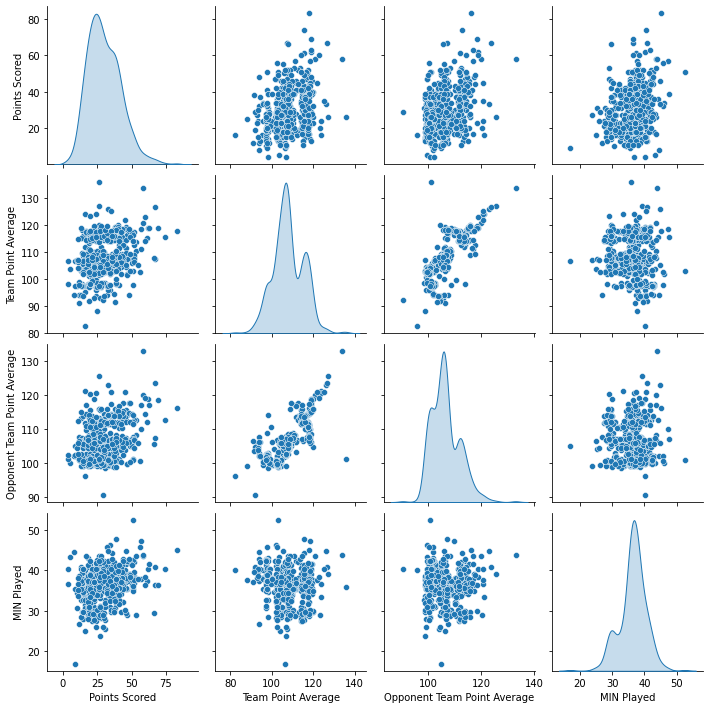

In [29]:
sns.pairplot(train_dataset[["Points Scored", "Team Point Average", "Opponent Team Point Average", "MIN Played"]], diag_kind="kde" )

In [30]:
train_stats = train_dataset.describe()
train_stats.pop("Points Scored")
train_stats = train_stats.transpose()
train_stats

#for this data this is not that informative but the mean gives a good impression of the number of times Damian Lillard had played the shown team

,count,mean,std,min,25%,50%,75%,max
MIN Played,519.0,36.382303,4.094041,16.966667,34.616667,36.683333,38.664167,52.5
Team Point Average,519.0,107.953541,7.290819,82.500000,103.145474,107.181818,114.283501,136.0
Opponent Team Point Average,519.0,106.587258,5.329897,90.500000,102.384091,105.941176,110.308841,133.0
ATL,519.0,0.023121,0.150434,0.000000,0.000000,0.000000,0.000000,1.0
BKN,519.0,0.023121,0.150434,0.000000,0.000000,0.000000,0.000000,1.0
BOS,519.0,0.025048,0.156422,0.000000,0.000000,0.000000,0.000000,1.0
CHA,519.0,0.023121,0.150434,0.000000,0.000000,0.000000,0.000000,1.0
CHI,519.0,0.023121,0.150434,0.000000,0.000000,0.000000,0.000000,1.0
CLE,519.0,0.025048,0.156422,0.000000,0.000000,0.000000,0.000000,1.0
DAL,519.0,0.046243,0.210213,0.000000,0.000000,0.000000,0.000000,1.0


In [31]:
train_labels = train_dataset.pop("Points Scored")
test_labels = test_dataset.pop("Points Scored")

In [32]:

def sigmoid(x):
    return(x - train_stats['mean'])/train_stats['std']
normed_train_data = sigmoid(train_dataset)
normed_test_data = sigmoid(test_dataset)


In [33]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [34]:
model = build_model()

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 10,497
Trainable params: 10,497
Non-trainable params: 0
_________________________________________________________________


In [37]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.36225557],
       [-0.20892519],
       [ 0.3464639 ],
       [ 0.3882908 ],
       [-0.28462854],
       [-0.21144852],
       [-0.32082355],
       [-0.3719895 ],
       [ 0.11939056],
       [ 0.00980197]], dtype=float32)

In [38]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print('')
        print('.', end='')
EPOCHS = 1000

history = model.fit(
    normed_train_data, train_labels,
    epochs=EPOCHS, validation_split= 0.2, verbose=0,
    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [39]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,7.890250,1.868457,7.890250,410.549103,14.877409,410.549103,995
996,9.307393,2.300705,9.307393,402.455109,14.801818,402.455109,996
997,10.451867,2.309440,10.451867,419.024261,15.079703,419.024261,997
998,6.486984,1.737636,6.486984,405.703156,14.751018,405.703156,998
999,9.410212,2.050004,9.410212,429.537476,15.064383,429.537476,999


In [41]:
import matplotlib.pyplot as plt 

def plot_history(history):
    hist= pd.DataFrame(history.history)
    hist["epoch"] = history.epoch

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Mean Absolute Error [Points Scored]")
    plt.plot(hist['epoch'], hist['mae'], label="Train Error")
    plt.plot(hist['epoch'], hist['val_mae'], label="Val Error")

    plt.legend()
    #plt.ylim([0,5])


    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Mean Square Error [$Points Scored^2$]")
    plt.plot(hist['epoch'], hist['mse'], label="Train Error")
    plt.plot(hist['epoch'], hist['val_mse'], label="Val Error")
    plt.legend()
    #plt.ylim([0,20])

#plot_history(history)


...........

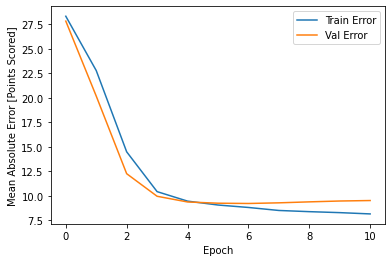

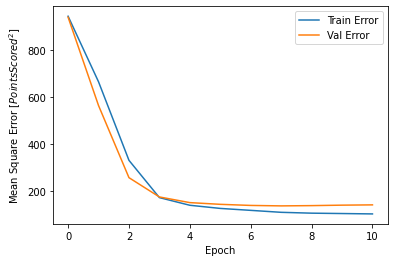

In [46]:
#early stopping

model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [47]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} Points Scored".format(mae))

Testing set Mean Abs Error:  8.66 Points Scored


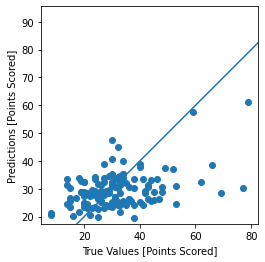

In [48]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel("True Values [Points Scored]")
plt.ylabel("Predictions [Points Scored]")
plt.axis('equal')
plt.axis('square')
#plt.xlim([0, plt.ylim()[1]])
#plt.ylim([0, plt.ylim()[1]])
_ = plt.plot([-100,100], [-100, 100])